In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
A = pd.read_csv("D:/Etlhive class data/Data Sets shared through Whatsapp/drive-download-20220503T072451Z-001/CANCER.csv")
A.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
A.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
A['concave_points_mean']= A['concave points_mean']
A['concave_points_se']= A['concave points_se']
A['concave_points_worst']=A['concave points_worst']
A = A.drop(labels=['Unnamed: 32','concave points_mean','concave points_se','concave points_worst'],axis=1)
A.shape

(569, 32)

In [4]:
X = A.drop(labels=['id','diagnosis'],axis=1)
Y = A[['diagnosis']]

In [5]:
import import_ipynb
from PM3 import ANOVA
q = []
for i in X.columns:
    q.append(ANOVA(A,'diagnosis',i))

importing Jupyter notebook from PM3.ipynb


In [6]:
pv = pd.DataFrame({'Column':X.columns,'pval':q})
pv.sort_values(by='pval')

,Column,pval
0,radius_mean,0.00000
27,concave_points_mean,0.00000
26,fractal_dimension_worst,0.00000
25,symmetry_worst,0.00000
24,concavity_worst,0.00000
23,compactness_worst,0.00000
22,smoothness_worst,0.00000
21,area_worst,0.00000
20,perimeter_worst,0.00000
19,texture_worst,0.00000


In [7]:
imp_cols = list(pv[pv.pval<0.05]['Column'])
imp_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'concave_points_mean',
 'concave_points_se',
 'concave_points_worst']

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=21,n_estimators=28,max_depth=9,criterion='entropy')
model = rfr.fit(X,Y)

In [9]:
Q = pd.DataFrame(X.columns,columns=["col"])
Q['imp']=model.feature_importances_

In [10]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
20,perimeter_worst,0.185124
21,area_worst,0.141753
18,radius_worst,0.128277
27,concave_points_mean,0.107111
6,concavity_mean,0.060871
2,perimeter_mean,0.046105
12,area_se,0.043321
29,concave_points_worst,0.038454
24,concavity_worst,0.025010
5,compactness_mean,0.024618


In [11]:
X = A[imp_cols]
Y = A[['diagnosis']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [12]:
tr = []
ts = []
for i in range(2,31):
    rfr = RandomForestClassifier(random_state=21,n_estimators=i)
    model = rfr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_err = accuracy_score(ytrain,tr_pred)
    ts_err = accuracy_score(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

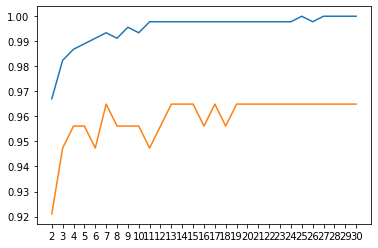

In [13]:
import matplotlib.pyplot as plt
r = range(2,31)
plt.plot(r,tr)
plt.plot(r,ts)
plt.xticks(range(2,31,1))
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestClassifier(random_state=21)

tg = {"n_estimators":range(2,30,1),"min_samples_split":range(2,20),"criterion":['gini','entropy']}
cv = GridSearchCV(rfr,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_split': 17, 'n_estimators': 20}

In [15]:
model = cvmodel.best_estimator_
ypred = model.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ypred,ytest)
print('Accuracy Score :',round(acc,4))

Accuracy Score : 0.9561


In [17]:
Q = pd.DataFrame(imp_cols,columns=["col"])
Q['imp']=model.feature_importances_
Q.sort_values(by=["imp"],ascending=False)

,col,imp
24,concave_points_worst,0.206057
15,perimeter_worst,0.181685
13,radius_worst,0.170720
16,area_worst,0.112134
2,perimeter_mean,0.083796
22,concave_points_mean,0.053874
6,concavity_mean,0.038927
8,radius_se,0.035458
20,symmetry_worst,0.019105
3,area_mean,0.017180


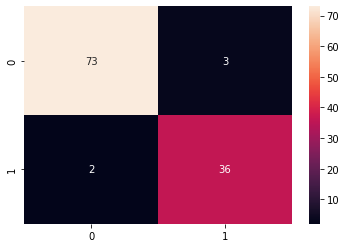

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf =confusion_matrix(ypred,ytest)
sb.heatmap(cf,annot=True)
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['diagnosis']=le.fit_transform(Y)

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [27]:
from xgboost import XGBClassifier
model2= XGBClassifier(n_estimators=1000, learning_rate=0.05)

# Fit the model
model2.fit(xtrain, ytrain, 
             eval_set=[(xtest, ytest)],
             verbose=False) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [29]:
pred = model2.predict(xtest)
from sklearn.metrics import accuracy_score,recall_score
acc = accuracy_score(pred,ytest)
rec = recall_score(pred,ytest)
print('Accuracy score is : ',round(acc,4))
print('Recall is         : ',round(rec,4))

Accuracy score is :  0.9649
Recall is         :  0.973


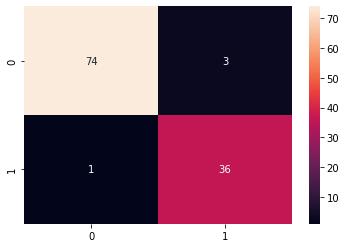

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf =confusion_matrix(pred,ytest)
sb.heatmap(cf,annot=True)
plt.show()